# Bimodal Gaussian Posterior - NPE_A method

In [1]:
import sbi
import sbi.utils
import sbi.inference
import sbi.diagnostics
import sbi.analysis
import lfi
import torch
import numpy as np

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## D = 2

In [2]:
D = 2
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1, D))
posterior_modes = np.ones((2,D))
posterior_modes[0,:] = -3.
posterior_modes[1,:] = 3.

In [3]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation=observation,
)

In [4]:
inference.train(simulation_budget=2_000)

  0%|          | 0/2000 [00:00<?, ?it/s]

 Neural network successfully converged after 287 epochs.

DirectPosterior sampler for potential_fn=<PosteriorBasedPotential>

In [5]:
samples = inference.sample(1_000)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

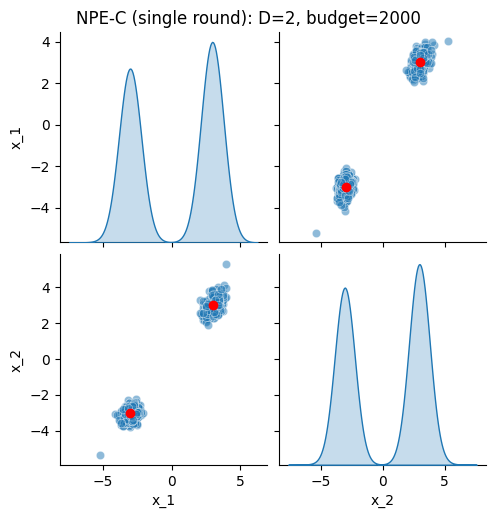

In [6]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=2_000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
    limits=torch.tensor([-10, 10.]).repeat(D, 1),
)

## D=5 (slightly higher dimensionality than toy case)

### failure budget=5_000

In [7]:
D = 5
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1, D))
posterior_modes = np.ones((2,D))
posterior_modes[0,:] = -3.
posterior_modes[1,:] = 3.

In [8]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation=observation,
)

In [9]:
simulation_budget = 5000
inference.train(simulation_budget=simulation_budget, num_components=2)

  0%|          | 0/5000 [00:00<?, ?it/s]

 Neural network successfully converged after 309 epochs.

DirectPosterior sampler for potential_fn=<PosteriorBasedPotential>

In [10]:
samples = inference.sample(1_000)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

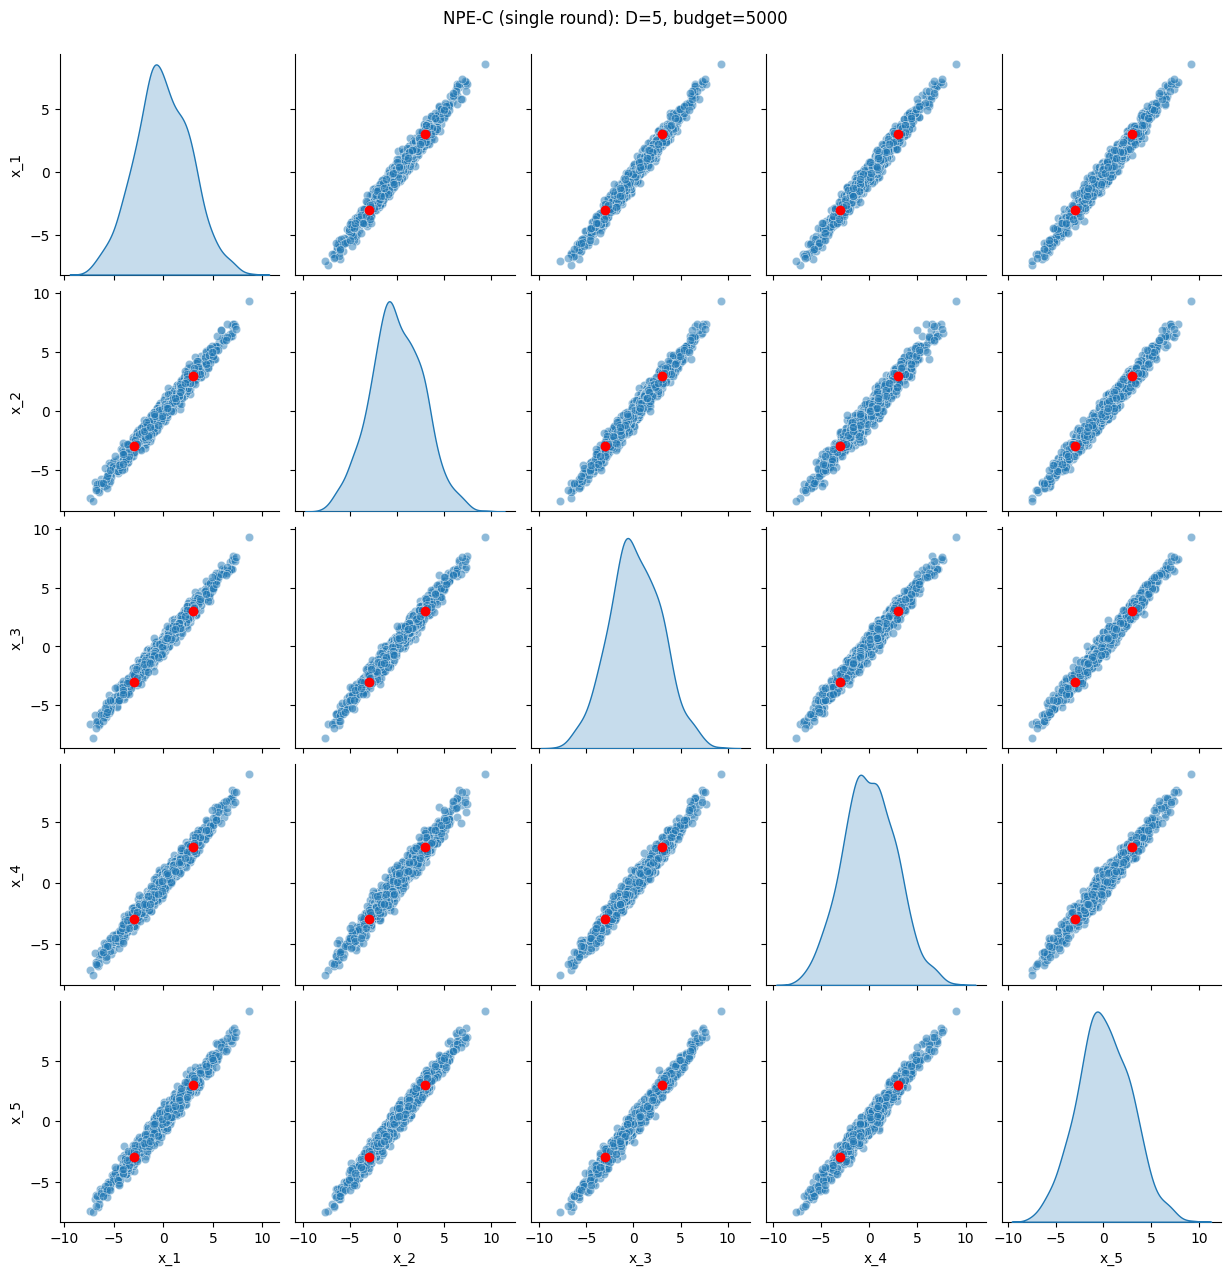

In [13]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=simulation_budget,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
    limits=torch.tensor([-10, 10.]).repeat(D, 1),
)

### success budget=25_000

In [15]:
D = 5
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1, D))
posterior_modes = np.ones((2,D))
posterior_modes[0,:] = -3.
posterior_modes[1,:] = 3.

In [16]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation=observation,
)

In [ ]:
simulation_budget = 50_000
inference.train(simulation_budget=simulation_budget, num_components=2)

  0%|          | 0/50000 [00:00<?, ?it/s]

 Training neural network. Epochs trained: 5

In [ ]:
samples = inference.sample(1_000)

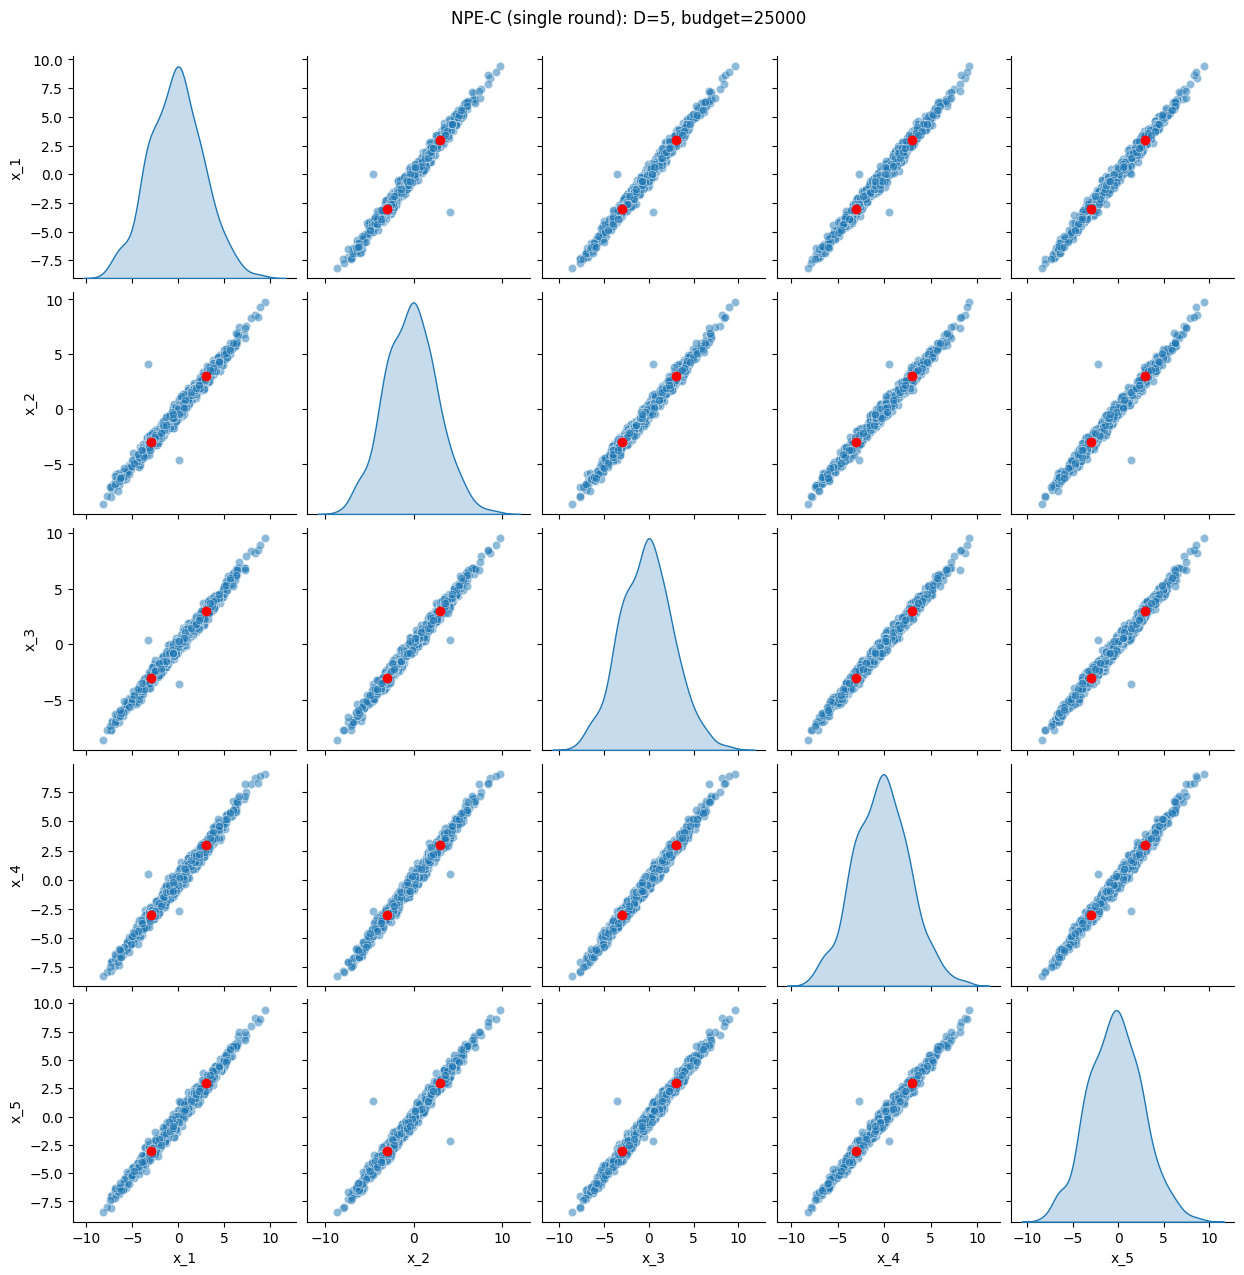

In [22]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=simulation_budget,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
    limits=torch.tensor([-10, 10.]).repeat(D, 1),
)